In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.9 MB/s eta 0:00:00


In [3]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.1 MB/s eta 0:00:00


In [13]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/Car_Dena_93 h 955 - ir 44_Data_07_18_2024, 15_09_00_to_09_18_2024, 15_09_00.xlsx'
xls = pd.ExcelFile(file_path)
data_sheet = pd.read_excel(xls, sheet_name='Data')




# Combined Data


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=721287.959, Time=27.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=732901.368, Time=16.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=722393.431, Time=9.75 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=721452.360, Time=11.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=732899.371, Time=2.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=721235.205, Time=63.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721477.787, Time=14.67 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=721211.915, Time=82.70 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=721343.577, Time=17.82 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=721213.690, Time=141.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=721225.189, Time=51.42 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=721215.465, Time=101.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=721281.432, Time=55.05 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=721215.843, Time=9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


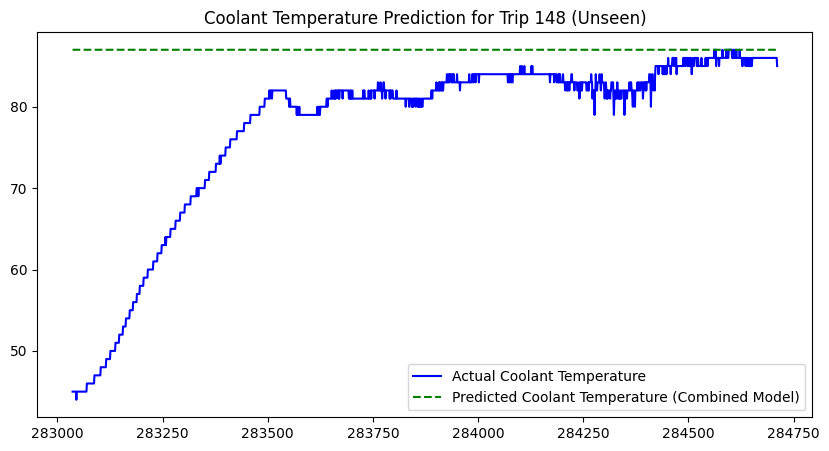

In [15]:


# Filter out trips with fewer than 500 rows
filtered_trips = data_sheet.groupby('trip').filter(lambda x: len(x) > 500)

# Extract unique trips
unique_trips = filtered_trips['trip'].unique()

# Combine all trips (except the last one) into a single series
combined_data = pd.concat([filtered_trips[filtered_trips['trip'] == trip]['Coolant_temperature']
                           for trip in unique_trips[:-1]])

# Fit an ARIMA model on the combined data
stepwise_model = auto_arima(combined_data, start_p=1, start_q=1,
                            max_p=5, max_q=5, seasonal=False,
                            trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

# Print the model summary
print(stepwise_model.summary())

# Now, use the last trip as unseen data
last_trip = unique_trips[-1]
new_trip_data = filtered_trips[filtered_trips['trip'] == last_trip]['Coolant_temperature']

# Predict for the last trip
predictions = stepwise_model.predict(n_periods=len(new_trip_data))

# Plot the actual vs predicted values for the last trip
plt.figure(figsize=(10, 5))

# Plot actual values
plt.plot(new_trip_data.index, new_trip_data, label='Actual Coolant Temperature', color='blue')

# Plot predictions from the combined model
plt.plot(new_trip_data.index, predictions, label='Predicted Coolant Temperature (Combined Model)', linestyle='--', color='green')

plt.title(f'Coolant Temperature Prediction for Trip {last_trip} (Unseen)')
plt.legend()
plt.show()
